In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import os, gc
import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_rows', 200)
pd.set_option('display.max.columns', 200)


from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

sns.set(context='notebook', style='whitegrid', palette='deep', font='sans-serif', 
        font_scale=2, color_codes=True, rc=None)

In [2]:
df = pd.read_csv('data/data.csv')
sub = pd.read_csv('data/sample_submission.csv')
df.head()

,Unnamed: 0,match_event_id,location_x,location_y,remaining_min,power_of_shot,knockout_match,game_season,remaining_sec,distance_of_shot,is_goal,area_of_shot,shot_basics,range_of_shot,team_name,date_of_game,home/away,shot_id_number,lat/lng,type_of_shot,type_of_combined_shot,match_id,team_id,remaining_min.1,power_of_shot.1,knockout_match.1,remaining_sec.1,distance_of_shot.1
0,0,10.0,167.0,72.0,10.0,1.0,0.0,2000-01,27.0,38.0,NaN,Right Side(R),Mid Range,16-24 ft.,Manchester United,2000-10-31,MANU @ POR,1.0,"45.539131, -122.651648",shot - 30,NaN,20000012,1610612747,10.00,1.0,50.608,54.2000,38.0
1,1,12.0,-157.0,0.0,10.0,1.0,0.0,2000-01,22.0,35.0,0.0,Left Side(L),Mid Range,8-16 ft.,Manchester United,2000-10-31,MANU @ POR,2.0,"45.539131, -122.651648",shot - 45,NaN,20000012,1610612747,10.00,1.0,28.800,22.0000,35.0
2,2,35.0,-101.0,135.0,7.0,1.0,0.0,2000-01,45.0,36.0,1.0,Left Side Center(LC),Mid Range,16-24 ft.,Manchester United,2000-10-31,NaN,3.0,"45.539131, -122.651648",shot - 25,NaN,20000012,1610612747,92.64,1.0,0.000,63.7216,54.4
3,3,43.0,138.0,175.0,6.0,1.0,0.0,2000-01,52.0,42.0,0.0,Right Side Center(RC),Mid Range,16-24 ft.,Manchester United,2000-10-31,MANU @ POR,4.0,"45.539131, -122.651648",NaN,shot - 3,20000012,1610612747,NaN,1.0,122.608,52.0000,42.0
4,4,155.0,0.0,0.0,NaN,2.0,0.0,2000-01,19.0,20.0,1.0,Center(C),Goal Area,Less Than 8 ft.,NaN,2000-10-31,MANU @ POR,5.0,"45.539131, -122.651648",NaN,shot - 1,20000012,1610612747,42.64,2.0,0.000,19.0000,20.0


In [3]:
df = df[~df.shot_id_number.isnull()]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29134 entries, 0 to 30696
Data columns (total 28 columns):
Unnamed: 0               29134 non-null int64
match_event_id           27654 non-null float64
location_x               27749 non-null float64
location_y               27670 non-null float64
remaining_min            27652 non-null float64
power_of_shot            27731 non-null float64
knockout_match           27710 non-null float64
game_season              23576 non-null object
remaining_sec            27620 non-null float64
distance_of_shot         27648 non-null float64
is_goal                  23179 non-null float64
area_of_shot             27714 non-null object
shot_basics              27640 non-null object
range_of_shot            27651 non-null object
team_name                27696 non-null object
date_of_game             27664 non-null object
home/away                27720 non-null object
shot_id_number           29134 non-null float64
lat/lng                  27665 non-n

In [5]:
df.drop(['Unnamed: 0', 'team_name','team_id'], axis=1, inplace=True)
df.shape

(29134, 25)

In [6]:
for col in df.columns:
    print("{0:<25} {1:<10} {2}".format(col, df[col].unique().shape[0], df[col].dtype))

match_event_id            617        float64
location_x                489        float64
location_y                449        float64
remaining_min             13         float64
power_of_shot             8          float64
knockout_match            3          float64
game_season               21         object
remaining_sec             61         float64
distance_of_shot          73         float64
is_goal                   3          float64
area_of_shot              7          object
shot_basics               8          object
range_of_shot             6          object
date_of_game              1559       object
home/away                 75         object
shot_id_number            29134      float64
lat/lng                   39         object
type_of_shot              58         object
type_of_combined_shot     7          object
match_id                  1559       int64
remaining_min.1           291        float64
power_of_shot.1           207        float64
knockout_match.1     

In [7]:
float_col = df.columns[df.dtypes == np.float64]
object_col = df.columns[df.dtypes == 'object']

float_col = list(float_col)
object_col = list(object_col)
float_col.remove('is_goal')

len(float_col), len(object_col)

(14, 9)

In [8]:
df['date_of_game'] = df['date_of_game'].astype('str')
df['date_of_game'] = df['date_of_game'].apply(lambda x: x.replace('nan', '2016-05-01'))

print(df.shape, "==>", end=" ")
df['year']  = df['date_of_game'].apply(lambda x: x.split('-')[0])
df['month'] = df['date_of_game'].apply(lambda x: x.split('-')[1])
df.drop(['game_season', 'date_of_game'], axis=1, inplace=True)
print(df.shape)

(29134, 25) ==> (29134, 25)


In [9]:
df['home/away'] = df['home/away'].astype('str')
df['home/away'] = df['home/away'].apply(lambda x: x.replace('nan', 'NEW'))

print(df.shape, "==>", end=" ")
df['home/away'] = df['home/away'].apply(lambda x: x[-3:])
print(df.shape)

(29134, 25) ==> (29134, 25)


In [10]:
df[float_col].isnull().sum()

match_event_id        1480
location_x            1385
location_y            1464
remaining_min         1482
power_of_shot         1403
knockout_match        1424
remaining_sec         1514
distance_of_shot      1486
shot_id_number           0
remaining_min.1       1435
power_of_shot.1       1450
knockout_match.1      1428
remaining_sec.1       1467
distance_of_shot.1    1481
dtype: int64

ValueError: Could not interpret input 'game_season'

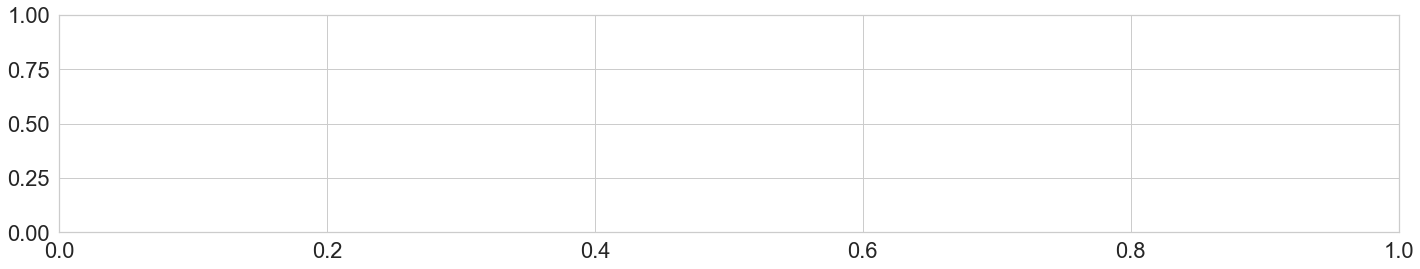

In [11]:
fig, ax = plt.subplots(figsize=(24, 4))

g = sns.countplot(x='game_season', hue='is_goal', data=df, ax=ax)
for item in g.get_xticklabels():
    item.set_rotation(45)

In [ ]:
sns.scatterplot(df[df.is_goal == 0].location_y, df[df.is_goal == 0].location_x, alpha=0.8, color='c')
sns.scatterplot(df[df.is_goal == 1].location_y, df[df.is_goal == 1].location_x, alpha=0.3, color='k')

In [ ]:
sns.kdeplot(df[df.is_goal == 1].location_y)
sns.kdeplot(df[df.is_goal == 0].location_y)

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=10, init='k-means++', n_init=10, verbose=1, random_state=1337, n_jobs=4)
kmeans.fit(df[['location_x','location_y']].dropna())

In [ ]:
kmeans.cluster_centers_

In [ ]:
fig, ax = plt.subplots(figsize=(22, 5))
sns.scatterplot(x='location_x', y='location_y', data=df[['location_x','location_y']].dropna(), hue=kmeans.labels_, ax=ax)

In [12]:
float_col

['match_event_id',
 'location_x',
 'location_y',
 'remaining_min',
 'power_of_shot',
 'knockout_match',
 'remaining_sec',
 'distance_of_shot',
 'shot_id_number',
 'remaining_min.1',
 'power_of_shot.1',
 'knockout_match.1',
 'remaining_sec.1',
 'distance_of_shot.1']

In [13]:
def get_quantile(df, col, q1, q2):
    """compute quantile range
    args:
        col: col name
        q1: lower quantile percentile
        q2: upper quantile percentile
    """
    df1 = df[[col]].dropna()
    lower_bound = np.percentile(df1, q=q1)
    upper_bound = np.percentile(df1, q=q2)
    lower_bound = np.round(lower_bound,3)
    upper_bound = np.round(upper_bound, 3)
    min_ = np.round(np.min(df1[col]), 3)
    max_ = np.round(np.max(df1[col]), 3)
    print("{4:<25} min: {0:<10} max: {1:<10} low: {2:<10} high: {3:<10}".format(min_, max_, lower_bound, upper_bound, col))

float_col.remove('match_event_id')
for col in float_col:
    try:
        get_quantile(df[df.is_goal == 0], col, 1, 99)
    except:
        print("couldn't do it")
        
print("=="*45)        

for col in float_col:
    try:
        get_quantile(df[df.is_goal == 1], col, 1, 99)
    except:
        print("couldn't do it")

location_x                min: -248.0     max: 248.0      low: -227.0     high: 230.0     
location_y                min: -42.0      max: 791.0      low: -19.0      high: 291.0     
remaining_min             min: 0.0        max: 11.0       low: 0.0        high: 11.0      
power_of_shot             min: 1.0        max: 7.0        low: 1.0        high: 5.0       
knockout_match            min: 0.0        max: 1.0        low: 0.0        high: 1.0       
remaining_sec             min: 0.0        max: 59.0       low: 0.0        high: 59.0      
distance_of_shot          min: 20.0       max: 99.0       low: 20.0       high: 51.0      
shot_id_number            min: 2.0        max: 30697.0    low: 322.51     high: 30381.98  
remaining_min.1           min: 0.0        max: 128.762    low: 0.0        high: 114.64    
power_of_shot.1           min: 1.0        max: 118.36     low: 1.0        high: 113.36    
knockout_match.1          min: 0.0        max: 141.352    low: 0.0        high: 129.928   

# SCORE: 1 / (1 + MAE)     .......  ##MAE: mean absolute error

## There seem to be duplicate columns, but turns out that these are uncorrelated component, which i guess, represent the first and second lap data, which make sense.

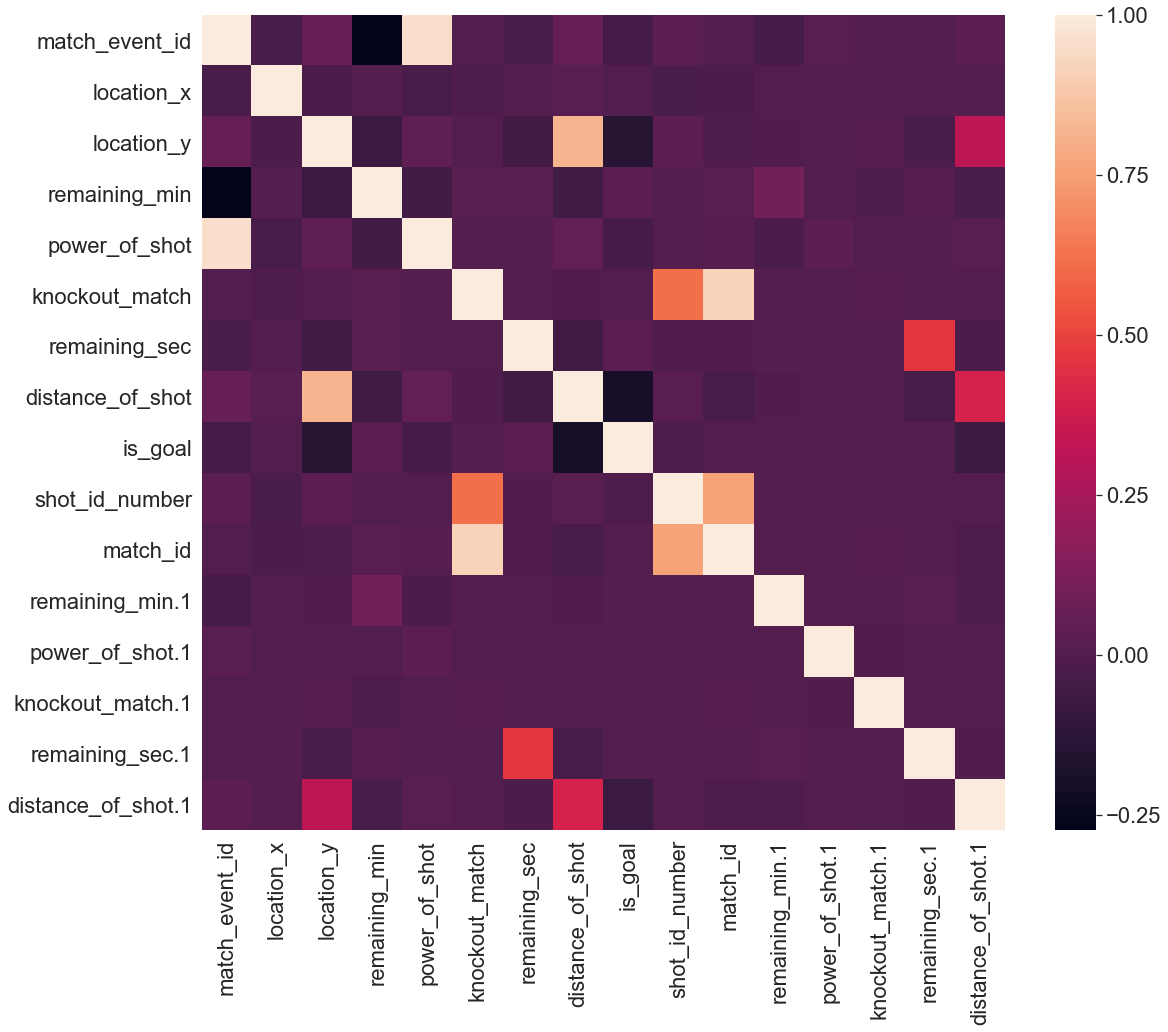

In [14]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(18,15))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, ax=ax)

In [15]:
len(object_col)

9

In [17]:
# fig, ax = plt.subplots(9,1, figsize=(25, 50))
# axes = ax.flatten()

# for i, col in enumerate(object_col):
#     sns.countplot(x=col, hue='is_goal', data=df, ax=axes[i])
#     print(i, end=" ")
    
#     for tick in axes[0].get_xticklabels():
#         tick.set_rotation(30)

In [18]:
df['lat/lng'] = df['lat/lng'].astype('str')
df['lat/lng'] = df['lat/lng'].apply(lambda x: x.replace('nan', '42.982923, -71.446094'))

print(df.shape, "==>", end=" ")
df['lat'] = df['lat/lng'].apply(lambda x: x.split(',')[0])
df['long'] = df['lat/lng'].apply(lambda x: x.split(',')[1])
df['lat'] = df['lat'].astype('float')
df['long'] = df['long'].astype('float')
print(df.shape)

(29134, 25) ==> (29134, 27)


In [19]:
df.drop(['lat/lng1'], axis=1, inplace=True)
df.shape

KeyError: "['lat/lng1'] not found in axis"

In [20]:
x = cos(lat) * cos(lon)
y = cos(lat) * sin(lon), 
z = sin(lat)

NameError: name 'cos' is not defined

In [21]:
# Hierarchical clustering, PAM, CLARA, and DBSCAN are popular examples of this.
df['loc_x'] = np.cos(df['lat']) * np.cos(df['long'])
df['loc_y'] = np.cos(df['lat']) * np.sin(df['long'])
df['loc_z'] = np.sin(df['lat'])
df.shape

(29134, 30)

In [22]:
df.isnull().sum().sort_values()

lat/lng                      0
loc_x                        0
long                         0
lat                          0
month                        0
year                         0
match_id                     0
loc_y                        0
shot_id_number               0
home/away                    0
loc_z                        0
location_x                1385
power_of_shot             1403
area_of_shot              1420
knockout_match            1424
knockout_match.1          1428
remaining_min.1           1435
power_of_shot.1           1450
location_y                1464
remaining_sec.1           1467
match_event_id            1480
distance_of_shot.1        1481
remaining_min             1482
range_of_shot             1483
distance_of_shot          1486
shot_basics               1494
remaining_sec             1514
is_goal                   5955
type_of_shot             14470
type_of_combined_shot    14664
dtype: int64

In [23]:
# df['area_of_shot'] = df['area_of_shot'].apply(lambda x: x.replace('nan', 'Center(C)'))
df['area_of_shot'].fillna('Center(C)', inplace=True)
df['range_of_shot'].fillna('Unknown', inplace=True)
df['shot_basics'].fillna('Unknown', inplace=True)

In [24]:
null_cols = ['location_x','power_of_shot','knockout_match.1','knockout_match','remaining_min.1','remaining_sec.1', 'distance_of_shot.1',
             'remaining_sec','power_of_shot.1','location_y','remaining_min','match_event_id','distance_of_shot']
df[null_cols].dtypes

location_x            float64
power_of_shot         float64
knockout_match.1      float64
knockout_match        float64
remaining_min.1       float64
remaining_sec.1       float64
distance_of_shot.1    float64
remaining_sec         float64
power_of_shot.1       float64
location_y            float64
remaining_min         float64
match_event_id        float64
distance_of_shot      float64
dtype: object

In [25]:
for col in null_cols:
    df[col] = df[col].fillna(df[col].median())

In [26]:
df.isnull().sum()

match_event_id               0
location_x                   0
location_y                   0
remaining_min                0
power_of_shot                0
knockout_match               0
remaining_sec                0
distance_of_shot             0
is_goal                   5955
area_of_shot                 0
shot_basics                  0
range_of_shot                0
home/away                    0
shot_id_number               0
lat/lng                      0
type_of_shot             14470
type_of_combined_shot    14664
match_id                     0
remaining_min.1              0
power_of_shot.1              0
knockout_match.1             0
remaining_sec.1              0
distance_of_shot.1           0
year                         0
month                        0
lat                          0
long                         0
loc_x                        0
loc_y                        0
loc_z                        0
dtype: int64

In [27]:
df['type_of_combined_shot'].fillna('shot - 6', inplace=True)
df['shot_null'] = df['type_of_shot'].isnull()
df['type_of_shot'].fillna('shot - 60', inplace=True)

In [28]:
df.isnull().sum()

match_event_id              0
location_x                  0
location_y                  0
remaining_min               0
power_of_shot               0
knockout_match              0
remaining_sec               0
distance_of_shot            0
is_goal                  5955
area_of_shot                0
shot_basics                 0
range_of_shot               0
home/away                   0
shot_id_number              0
lat/lng                     0
type_of_shot                0
type_of_combined_shot       0
match_id                    0
remaining_min.1             0
power_of_shot.1             0
knockout_match.1            0
remaining_sec.1             0
distance_of_shot.1          0
year                        0
month                       0
lat                         0
long                        0
loc_x                       0
loc_y                       0
loc_z                       0
shot_null                   0
dtype: int64

In [29]:
df['loc_x'] = df['loc_x']*6371
df['loc_y'] = df['loc_y']*6371
df['loc_z'] = df['loc_z']*6371

In [30]:
object_col.remove('game_season')
object_col.remove('date_of_game')


In [31]:
object_col = object_col + ['year','month']
for col in object_col:
    df[col] = df[col].astype('category').cat.codes


In [32]:
df['shot_null'] = df['shot_null'].astype('int')
df.dtypes

match_event_id           float64
location_x               float64
location_y               float64
remaining_min            float64
power_of_shot            float64
knockout_match           float64
remaining_sec            float64
distance_of_shot         float64
is_goal                  float64
area_of_shot                int8
shot_basics                 int8
range_of_shot               int8
home/away                   int8
shot_id_number           float64
lat/lng                     int8
type_of_shot                int8
type_of_combined_shot       int8
match_id                   int64
remaining_min.1          float64
power_of_shot.1          float64
knockout_match.1         float64
remaining_sec.1          float64
distance_of_shot.1       float64
year                        int8
month                       int8
lat                      float64
long                     float64
loc_x                    float64
loc_y                    float64
loc_z                    float64
shot_null 

In [33]:
# sub1 = sub.copy()

In [34]:
df['shot_id_number'] = df['shot_id_number'].astype(int)

In [48]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10, random_state=1337).fit(train_df[['location_x','location_y']])


In [49]:
np.bincount(kmeans.predict(test_df[['location_x','location_y']]))

array([ 508, 1590,  472,  479,  815,  459,  509,  610,  501,   12])

In [50]:
np.bincount(kmeans.labels_)

array([2008, 5897, 1988, 1789, 3023, 1766, 1953, 2601, 2093,   61])

In [51]:
ts_loc_xy = kmeans.predict(test_df[['location_x','location_y']])
tr_loc_xy = kmeans.labels_

In [52]:
from sklearn.cluster import ward_tree
from sklearn.cluster import AgglomerativeClustering

# for linkage in ('ward', 'average', 'complete'):
    

In [62]:
agglo = AgglomerativeClustering(linkage='ward', n_clusters=10)
ts_long_lat_xy1 = agglo.fit_predict(df[['location_x','location_y']])


In [61]:
# ts_long_lat_xy = agglo.fit_predict(df[['location_x','location_y']])
# tr_long_lat_xy = agglo.labels_

KeyboardInterrupt: 

In [58]:
np.bincount(ts_long_lat_xy), np.bincount(tr_long_lat_xy)


(array([1713,  350,  581,  529,  614,  429,  500,  563,  424,  252]),
 array([1713,  350,  581,  529,  614,  429,  500,  563,  424,  252]))

In [ ]:
agglo = AgglomerativeClustering(linkage='average', n_clusters=10)
ts_long_lat_xy1 = agglo.fit_predict(df[['location_x','location_y']])


In [ ]:
agglo = AgglomerativeClustering(linkage='complete', n_clusters=10)
agglo.fit(train_df[['lat','long']])

In [35]:
try:
    del df1
    gc.collect()
except:
    print("df not exist")
    
df1 = df.copy()
df1.isnull().sum()

train_df = df[~df.is_goal.isnull()]
test_df  = df[df.is_goal.isnull()]

target = train_df['is_goal']
train_df.drop(['is_goal'], axis=1, inplace=True)
test_df.drop(['is_goal'], axis=1, inplace=True)

train_df.shape, test_df.shape

df not exist


((23179, 30), (5955, 30))

In [36]:
test_df_id = test_df.shot_id_number
len(test_df.shot_id_number)

5955

In [37]:
train_df.drop(['shot_id_number'], axis=1, inplace=True)
test_df.drop(['shot_id_number'], axis=1, inplace=True)


In [56]:

import pandas as pd
import numpy as np
import os, gc
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import roc_auc_score, mean_squared_error, mean_absolute_error
from catboost import Pool, CatBoostClassifier, CatBoostRegressor
import lightgbm as lgb
import xgboost as xgb


def train_lgb_model(X_train, y_train, X_valid, y_valid, features, param, X_test, num_round):
    """
    Args:
        X_train, X_valid: training and valid data
        y_train, y_valid: training and valid target
        X_test: test-data
        features: training features
    Return:
        oof-pred, test_preds model, model_imp
    """
    _train = lgb.Dataset(X_train[features], label=y_train, feature_name=list(features))
    _valid = lgb.Dataset(X_valid[features], label=y_valid,feature_name=list(features))
    
    clf = lgb.train(param, _train, num_round, 
                    valid_sets = [_train, _valid], 
                    verbose_eval=200, 
                    early_stopping_rounds = 25)                  
    
    oof = clf.predict(X_valid[features], num_iteration=clf.best_iteration)
    test_pred = clf.predict(X_test[features], num_iteration=clf.best_iteration)
    
    lgb_imp = pd.DataFrame(data=[clf.feature_name(), list(clf.feature_importance())]).T
    lgb_imp.columns = ['feature','imp']
    
    return oof, test_pred, clf, lgb_imp
    



def run_cv_lgb(train_df, target, test_df, leaves=None):

    param = {
        'bagging_freq'           : 5,
        'bagging_fraction'       : 0.33,
        'boost_from_average'     : 'false',
        'boost'                  : 'gbdt',
        'feature_fraction'       : 0.3,
        'learning_rate'          : 0.01,
        'max_depth'              : -1,
        'metric'                 : 'auc',
        'min_data_in_leaf'       : 100,
#         'min_sum_hessian_in_leaf': 10.0,
        'num_leaves'             : 30,
        'num_threads'            : 4,
        'tree_learner'           : 'serial',
        'objective'              : 'binary',
        'verbosity'              : 1,
    #     'lambda_l1'              : 0.001,
        'lambda_l2'              : 0.1
    }   
    if leaves is not None:
        param['num_leaves'] = leaves
        print("using leaves: ", param['num_leaves'])

    random_seed = 1234
    n_splits = 3
    num_round = 10000
    feature_imp = pd.DataFrame()
    
    folds = KFold(n_splits=n_splits, shuffle=True, random_state=random_seed)
    oof_lgb = np.zeros(len(train_df))
    predictions = np.zeros((len(test_df),n_splits))

    clfs = []
    
    for fold_, (train_index, valid_index) in enumerate(folds.split(train_df, target)):
        print(train_index.shape, valid_index.shape)
        print("Fold {}".format(fold_))
    
        y_train, y_valid = target.iloc[train_index], target.iloc[valid_index]
        X_train, X_valid = train_df.iloc[train_index,:], train_df.iloc[valid_index,:]
        features = X_train.columns


        num_round = 10000
        oof, test_pred, clf, lgb_imp = train_lgb_model(X_train, y_train, 
                                                       X_valid, y_valid, 
                                                       features, param, 
                                                       test_df, num_round)
        lgb_imp['fold'] = fold_
        feature_imp = pd.concat([feature_imp, lgb_imp], axis=0)
    
        oof_lgb[valid_index] = oof
        predictions[:,fold_] = test_pred
        clfs.append(clf)
        
        score = mean_absolute_error(y_valid, oof)
        print( "  score = ", 1/(1 + score) )
        print("="*60)
    
    feature_imp.imp = feature_imp.imp.astype('float')
    feature_imp = feature_imp.groupby(['feature'])['imp'].mean()
    feature_imp = pd.DataFrame(data=[feature_imp.index, feature_imp.values]).T
    feature_imp.columns=['feature','imp']
    feature_imp = feature_imp.sort_values(by='imp')

    return clfs, feature_imp, oof_lgb, predictions




In [61]:
pred_lgb.mean(axis=1)

array([0.42821985, 0.52712094, 0.59885386, ..., 0.52250805, 0.48494978,
       0.55239276])

In [58]:
clfs_lgb, imp_lgb, oof_lgb, pred_lgb = run_cv_lgb(train_df, target, test_df, leaves=50)


using leaves:  50
(15452,) (7727,)
Fold 0
Training until validation scores don't improve for 25 rounds.
Early stopping, best iteration is:
[74]	training's auc: 0.673462	valid_1's auc: 0.628395
  score =  0.6735286491699986
(15453,) (7726,)
Fold 1
Training until validation scores don't improve for 25 rounds.
[200]	training's auc: 0.694695	valid_1's auc: 0.634547
Early stopping, best iteration is:
[304]	training's auc: 0.711265	valid_1's auc: 0.638797
  score =  0.6822515052285273
(15453,) (7726,)
Fold 2
Training until validation scores don't improve for 25 rounds.
Early stopping, best iteration is:
[131]	training's auc: 0.685328	valid_1's auc: 0.634595
  score =  0.6772141428442572


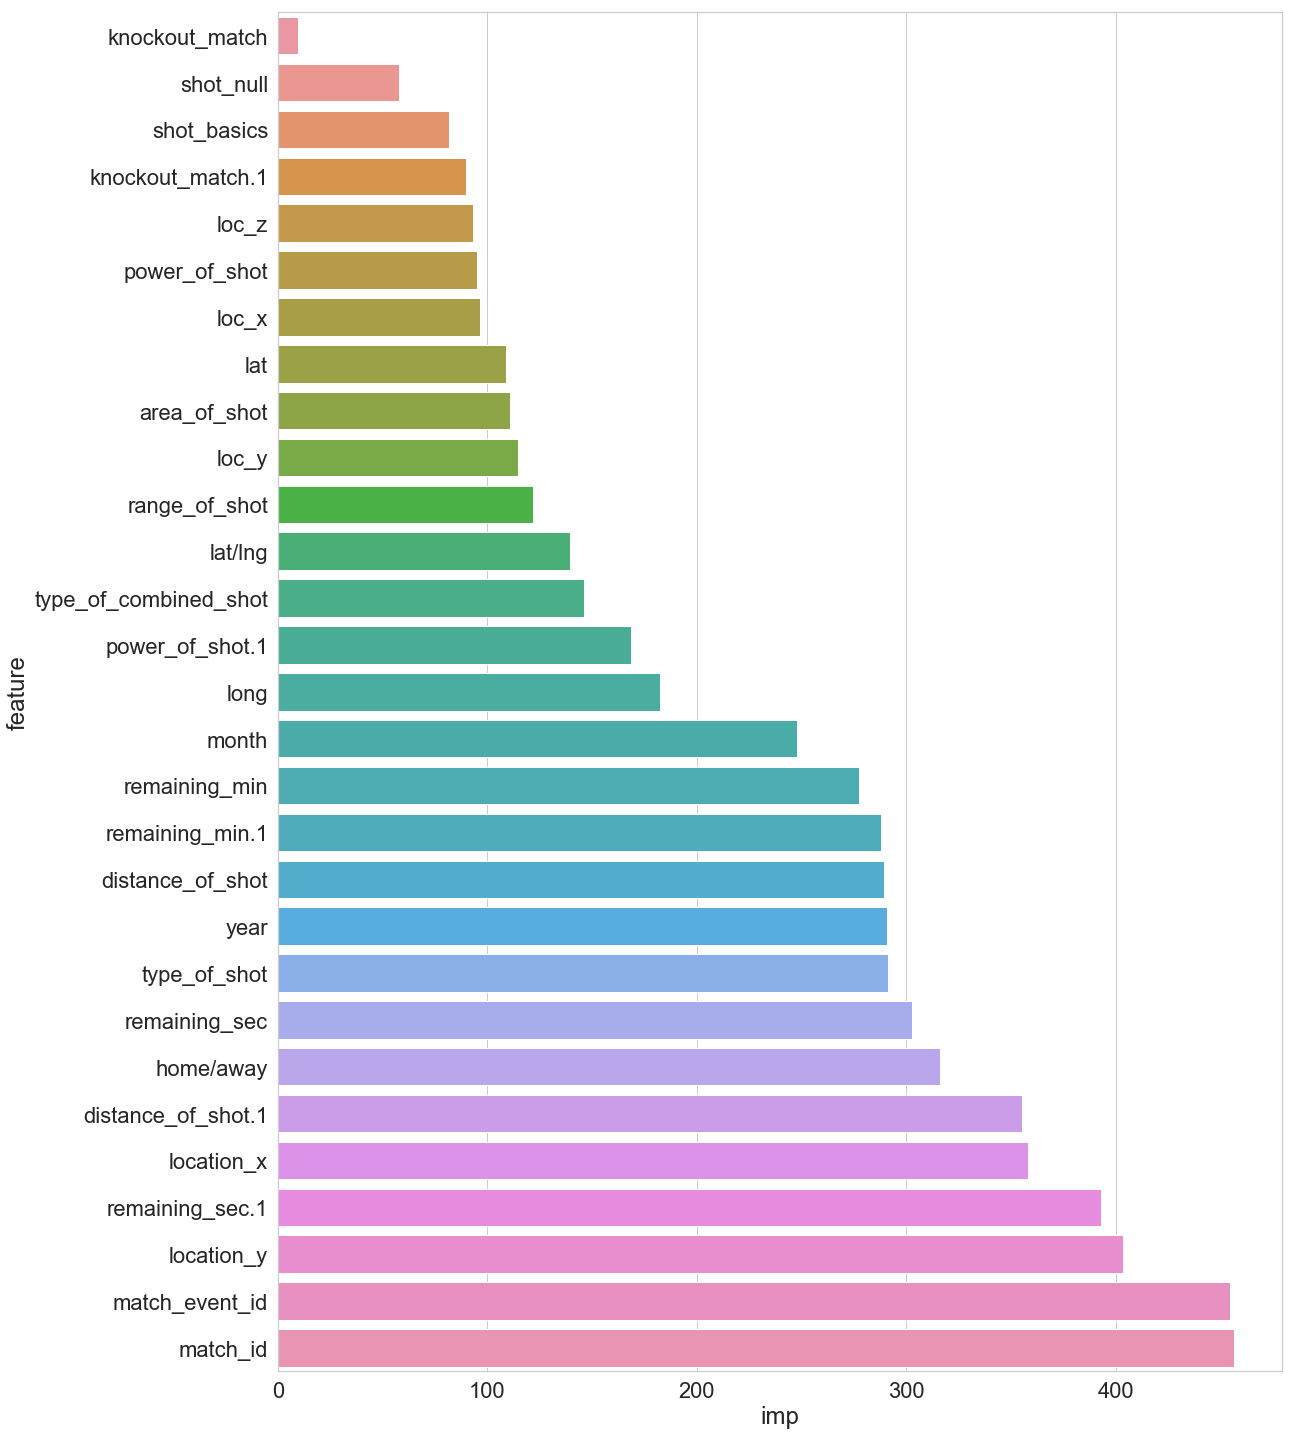

In [63]:

fig, ax = plt.subplots(1,1,figsize=(18, 25))
sns.barplot(x='imp',y='feature',data=imp_lgb, ax=ax)


In [70]:
len(list(set(train_df['match_id']).intersection(test_df['match_id']))), len(list(set(train_df['match_id']))), len(list(set(test_df['match_id'])))

(1494, 1558, 1495)

In [79]:
from catboost import Pool, CatBoostClassifier, CatBoostRegressor

def train_cat_model(X_train, y_train, X_valid, y_valid, features, param, X_test, 
                    num_round):
    """
    Args:
        X_train, X_valid: training and valid data
        y_train, y_valid: training and valid target
        X_test: test-data
        features: training features
    Return:
        oof-pred, test_preds, model, model_imp
    """
    param['iterations'] = num_round
    
    _train = Pool(X_train[features], label=y_train)#, cat_features=cate_features_index)
    _valid = Pool(X_valid[features], label=y_valid)#, cat_features=cate_features_index)

    watchlist = [_train, _valid]
    clf = CatBoostClassifier(**param)
    clf.fit(_train, 
            eval_set=watchlist, 
            verbose=200,
            use_best_model=True)
        
    oof  = clf.predict_proba(X_valid[features])[:,1]
    test_pred  = clf.predict_proba(X_test[features])[:,1]

    cat_imp = pd.DataFrame(data=[clf.feature_names_, 
                                 list(clf.feature_importances_)]).T
    cat_imp.columns = ['feature','imp']
    
    return oof, test_pred, clf, cat_imp


def run_cv_cat(train_df, target, test_df, depth):

    params = {
        'loss_function'         : "Logloss", 
        'eval_metric'           : "AUC",
        'random_strength'       : 1.5,
        'border_count'          : 128,
#         'scale_pos_weight'      : 3.507,
        'depth'                 : depth, 
        'early_stopping_rounds' : 50,
        'random_seed'           : 1337,
        'task_type'             : 'CPU', 
#         'subsample'             = 0.7, 
        'iterations'            : 10000, 
        'learning_rate'         : 0.09,
        'thread_count'          : 4
    }


    ##########################
    n_splits = 3
    random_seed = 1234
    feature_imp = pd.DataFrame()
    
    folds = KFold(n_splits=n_splits, shuffle=True, random_state=random_seed)
    oof_cat = np.zeros(len(train_df))
    predictions = np.zeros((len(test_df),n_splits))
    clfs = []
##########################
    for fold_, (train_index, valid_index) in enumerate(folds.split(train_df, target)):
        print(train_index.shape, valid_index.shape)
        print("Fold {}".format(fold_))
    
        y_train, y_valid = target.iloc[train_index], target.iloc[valid_index]
        X_train, X_valid = train_df.iloc[train_index,:], train_df.iloc[valid_index,:]
        features = X_train.columns
        
        num_rounds = 10000
        oof, test_pred, clf, cat_imp = train_cat_model(X_train, y_train, 
                                                       X_valid, y_valid, 
                                                       features, params, 
                                                       test_df, num_rounds)
    
        oof_cat[valid_index] = oof
        predictions[:,fold_] = test_pred
        
        cat_imp['fold'] = fold_
        feature_imp = pd.concat([feature_imp, cat_imp], axis=0)
        clfs.append(clf)
        
        score = mean_absolute_error(y_valid, oof)
        print( "  score = ", 1/(1 + score) )
        print("="*60)
    
    feature_imp.imp = feature_imp.imp.astype('float')
    feature_imp = feature_imp.groupby(['feature'])['imp'].mean()
    feature_imp = pd.DataFrame(data=[feature_imp.index, feature_imp.values]).T
    feature_imp.columns=['feature','imp']
    feature_imp = feature_imp.sort_values(by='imp')

    return clfs, feature_imp, oof_cat, predictions



In [80]:
clfs_cat, imp_cat, oof_cat, pred_cat = run_cv_cat(train_df, target, test_df, 4)


(15452,) (7727,)
Fold 0
0:	test: 0.6065161	test1: 0.5962655	best: 0.5962655 (0)	total: 20.5ms	remaining: 3m 25s
200:	test: 0.6908233	test1: 0.6362063	best: 0.6369455 (191)	total: 4.42s	remaining: 3m 35s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.6387264319
bestIteration = 298

Shrink model to first 299 iterations.
  score =  0.6863728561258555
(15453,) (7726,)
Fold 1
0:	test: 0.5899215	test1: 0.5902175	best: 0.5902175 (0)	total: 19.5ms	remaining: 3m 14s
200:	test: 0.6895993	test1: 0.6437939	best: 0.6438122 (199)	total: 4.35s	remaining: 3m 31s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.6442297644
bestIteration = 221

Shrink model to first 222 iterations.
  score =  0.6873001669288972
(15453,) (7726,)
Fold 2
0:	test: 0.5972592	test1: 0.5931461	best: 0.5931461 (0)	total: 25.5ms	remaining: 4m 14s
200:	test: 0.6928077	test1: 0.6365942	best: 0.6375344 (181)	total: 4.48s	remaining: 3m 38s
Stopped by overfitting detector  (50 iterations wait)



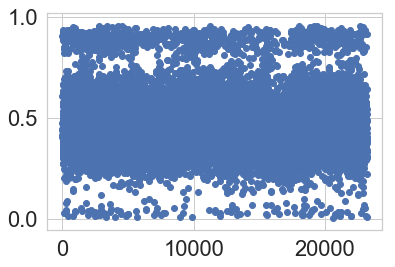

In [81]:
plt.scatter(range(len(oof_cat)), oof_cat)

In [92]:
# sub.columns
# sub_cat = pd.DataFrame(data=[list(test_df_id), list(pred_cat.mean(axis=1))]).T#, columns=sub.columns)
# sub_cat.columns = sub.columns
sub_cat.shot_id_number = sub_cat['shot_id_number'].astype(int)

In [95]:
os.makedirs('sub/')
sub_cat.to_csv('sub/ankish_bansal_251094_prediction_1.csv', index=None)


In [337]:

def train_xgb_model(X_train, y_train, X_valid, y_valid, features, param, X_test, 
                    num_round):
    """
    Args:
        X_train, X_valid: training and valid data
        y_train, y_valid: training and valid target
        X_test: test-data
        features: training features
    Return:
        oof-pred, test_preds, model, model_imp
    """
    _train = xgb.DMatrix(X_train[features], label=y_train, feature_names=list(features))
    _valid = xgb.DMatrix(X_valid[features], label=y_valid,feature_names=list(features))
    
    watchlist = [(_valid, 'valid')]
    clf = xgb.train(dtrain=_train, 
                    num_boost_round=num_round, 
                    evals=watchlist,
                    early_stopping_rounds=25, 
                    verbose_eval=200, 
                    params=param)
    
    valid_frame = xgb.DMatrix(X_valid[features],feature_names=list(features))
    oof  = clf.predict(valid_frame, ntree_limit=clf.best_ntree_limit)


    test_frame = xgb.DMatrix(X_test[features],feature_names=list(features))
    test_pred = clf.predict(test_frame, ntree_limit=clf.best_ntree_limit)

    
    xgb_imp = pd.DataFrame(data=[list(clf.get_fscore().keys()), 
                                 list(clf.get_fscore().values())]).T
    xgb_imp.columns = ['feature','imp']
    xgb_imp.imp = xgb_imp.imp.astype('float')
    
    return oof, test_pred, clf, xgb_imp


def run_cv_xgb(train_df, target, test_df, depth):

    features = train_df.columns
    params = {
        'eval_metric'     : 'auc',
        'seed'            : 1337,
        'eta'             : 0.01,
        'subsample'       : 0.7,
        'colsample_bytree': 0.5,
        'silent'          : 1,
        'nthread'         : 4,
        'Scale_pos_weight': 3.607,
        'objective'       : 'binary:logistic',
        'max_depth'       : depth,
        'alpha'           : 0.05
    }
    
    n_splits = 3
    random_seed = 1234
    feature_imp = pd.DataFrame()
    
    folds = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=random_seed)
    oof_xgb = np.zeros(len(train_df))
    predictions = np.zeros((len(test_df),n_splits))
    clfs = []
##########################
    for fold_, (train_index, valid_index) in enumerate(folds.split(train_df, target)):
        print(train_index.shape, valid_index.shape)
        print("Fold {}".format(fold_))
    
        y_train, y_valid = target.iloc[train_index], target.iloc[valid_index]
        X_train, X_valid = train_df.iloc[train_index,:], train_df.iloc[valid_index,:]
        features = X_train.columns
        

        num_rounds = 10000
        oof, test_pred, clf, xgb_imp = train_xgb_model(X_train, y_train, 
                                                       X_valid, y_valid, 
                                                       features, params, 
                                                       test_df, num_rounds)
        
        xgb_imp['fold'] = fold_
        feature_imp = pd.concat([feature_imp, xgb_imp], axis=0)
    
        oof_xgb[valid_index] = oof
        predictions[:,fold_] = test_pred
        clfs.append(clf)
        
        score = roc_auc_score(y_valid, oof)
        print( "  auc = ", score )
        print("="*60)
    
    feature_imp.imp = feature_imp.imp.astype('float')
    feature_imp = feature_imp.groupby(['feature'])['imp'].mean()
    feature_imp = pd.DataFrame(data=[feature_imp.index, feature_imp.values]).T
    feature_imp.columns=['feature','imp']
    feature_imp = feature_imp.sort_values(by='imp')


    return clfs, feature_imp, oof_xgb, predictions


In [338]:
clfs_xgb, imp_xgb, oof_xgb, pred_xgb = run_cv_xgb(train_df, target, test_df, 10)


(16285,) (8144,)
Fold 0
[0]	valid-auc:0.603787
Will train until valid-auc hasn't improved in 25 rounds.
Stopping. Best iteration:
[21]	valid-auc:0.628056

  auc =  0.6280564084130539
(16286,) (8143,)
Fold 1
[0]	valid-auc:0.586252
Will train until valid-auc hasn't improved in 25 rounds.
Stopping. Best iteration:
[18]	valid-auc:0.643972

  auc =  0.643971826235655
(16287,) (8142,)
Fold 2
[0]	valid-auc:0.568805
Will train until valid-auc hasn't improved in 25 rounds.
Stopping. Best iteration:
[170]	valid-auc:0.643401

  auc =  0.6434009285853521


In [345]:
pred_xgb.mean(axis=1)

array([0.45247984, 0.49586807, 0.51881551, ..., 0.53684777, 0.4769396 ,
       0.51013551])

In [346]:
sub.head()

,shot_id_number,is_goal
0,1,0.1
1,8,0.1
2,17,0.1
3,20,0.1
4,33,0.1


In [348]:
sub.shape, pred_xgb.shape

((5000, 2), (6268, 3))

In [6]:
pd.read_csv('sub/ankish_bansal_251094_prediction_3.csv').dtypes

shot_id_number      int64
is_goal           float64
dtype: object

In [4]:
sub = pd.read_csv('data/sample_submission.csv')
sub.dtypes

shot_id_number      int64
is_goal           float64
dtype: object